# Ejemplo de cambio de coordenadas utilizando eigenvectores de una matriz

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

Considérese la siguiente ecuación cuadrática:

$$57x^2 - 14 \sqrt{3} xy + 43 y^2=576$$


---


**Observación** 

Equivalentemente la ecuación $1 = \frac{19}{192}x^2 - \frac{7 \sqrt{3}}{288}xy + \frac{43}{576}y^2$ representa a la misma elipse inclinada.

---

Con Geometría Analítica sabemos que tal ecuación representa una elipse inclinada. El desarrollo que continúa mostrará que tal ecuación es equivalente a:

$$\frac{\tilde{x}^2}{16} + \frac{\tilde{y}^2}{9} = 1.$$

la cual representa a la misma elipse pero en los ejes coordenados $\tilde{x}\tilde{y}$ rotados un ángulo $\theta$.

Si:

In [2]:
D = sympy.Matrix([[sympy.Rational(1,16), 0],
                  [0, sympy.Rational(1,9)]])

In [3]:
sympy.pprint(D)

⎡1/16   0 ⎤
⎢         ⎥
⎣ 0    1/9⎦


entonces el producto 

$$\left [ \begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ] ^TD 
\left [
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ]
$$

es:

In [4]:
x_tilde, y_tilde = sympy.symbols("x_tilde, y_tilde")
x_y_tilde = sympy.Matrix([x_tilde, y_tilde])

In [5]:
sympy.pprint((x_y_tilde.T*D*x_y_tilde)[0])

       2          2
x_tilde    y_tilde 
──────── + ────────
   16         9    


---

**Definición**

Al producto $x^TAx$ con $A$ simétrica se le nombra forma cuadrática y es un número en $\mathbb{R}$.


---

A partir de la ecuación:

$$\frac{\tilde{x}^2}{16} + \frac{\tilde{y}^2}{9} = 1$$

rotemos al [eje mayor de la elipse](https://en.wikipedia.org/wiki/Semi-major_and_semi-minor_axes) un ángulo de $\theta = \frac{\pi}{3}$ en **sentido contrario a las manecillas del reloj** con una {ref}`transformación de rotación <TROT>` que genera la ecuación matricial:


$$\begin{array}{l}
\left[
\begin{array}{c}
x\\
y
\end{array}
\right ]
=
\left [
\begin{array}{cc}
\cos(\theta) & -\sin(\theta)\\
\sin(\theta) & \cos(\theta)
\end{array}
\right ]
\left[
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ]
=
\left [
\begin{array}{cc}
\frac{1}{2} & -\frac{\sqrt{3}}{2}\\
\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{array}
\right ]
\left[
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ]
=
Q\left[
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ]
\end{array}
$$

donde: $Q$ es la matriz de rotación en sentido contrario a las manecillas del reloj por el ángulo $\theta$.

Esto es:

$$
\begin{eqnarray}
x =\frac{\tilde{x}}{2} - \frac{\tilde{y}\sqrt{3}}{2} \nonumber \\
y =\frac{\tilde{x}\sqrt{3}}{2} + \frac{\tilde{y}}{2} \nonumber
\end{eqnarray}
$$

Despejando $\tilde{x},\tilde{y}$:

$$\begin{array}{l}
\left[
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ]
=
\left [
\begin{array}{cc}
\cos(\theta) & \sin(\theta)\\
-\sin(\theta) & \cos(\theta)
\end{array}
\right ]
\left[
\begin{array}{c}
x\\
y
\end{array}
\right ]
=
Q^T\left[
\begin{array}{c}
x\\
y
\end{array}
\right ]
\end{array}
$$



y sustituyendo en $\frac{\tilde{x}^2}{16} + \frac{\tilde{y}^2}{9} = 1$ resulta en la ecuación:



In [6]:
theta = sympy.pi/3
Q = sympy.Matrix([[sympy.cos(theta), -sympy.sin(theta)],
                  [sympy.sin(theta), sympy.cos(theta)]])
x,y = sympy.symbols("x, y")
x_tilde = (Q.T*sympy.Matrix([x,y]))[0]
y_tilde = (Q.T*sympy.Matrix([x,y]))[1]

sympy.pprint((x_tilde**2/16 + y_tilde**2/9).expand()*576) #576 is the least common denominator


    2                   2
57⋅x  - 14⋅√3⋅x⋅y + 43⋅y 


---
**Recuérdese**

Ecuación de una elipse inclinada.

$$57x^2 - 14 \sqrt{3} xy + 43 y^2=576$$

---

Que es equivalente a la forma cuadrática

$$\left [ \begin{array}{c}
x\\
y
\end{array}
\right ]^T A 
\left [
\begin{array}{c}
x\\
y
\end{array}
\right ]
$$ 


In [7]:
x_y = sympy.Matrix([x,y])
A = Q*D*Q.T
sympy.pprint(((x_y.T*A*x_y)[0]).expand()*576)

    2                   2
57⋅x  - 14⋅√3⋅x⋅y + 43⋅y 


con $A$ matriz dada por $A=QDQ^T$:

In [8]:
sympy.pprint(A)

⎡  19    -7⋅√3 ⎤
⎢ ───    ──────⎥
⎢ 192     576  ⎥
⎢              ⎥
⎢-7⋅√3     43  ⎥
⎢──────   ───  ⎥
⎣ 576     576  ⎦


---

**Observación**

Observa que $A$ es **simétrica**.

---

En este ejemplo la matriz $Q$ de rotación es la matriz que diagonaliza ortogonalmente a $A$ pues: $Q^TAQ = D.$


Para realizar la **gráfica** de la elipse con *NumPy* observar que:

In [9]:
sympy.pprint(((x_y.T*A*x_y)[0]).expand())

    2                  2
19⋅x    7⋅√3⋅x⋅y   43⋅y 
───── - ──────── + ─────
 192      288       576 


$$
\begin{eqnarray}
1&=&\frac{19}{192}x^2 - \frac{7 \sqrt{3}}{288}xy + \frac{43}{576}y^2 \nonumber \\
&=& \left [ \begin{array}{c}
x\\
y
\end{array}
\right ]^T A 
\left [
\begin{array}{c}
x\\
y
\end{array}
\right ] \nonumber \\
&=& \left [ \begin{array}{c}
x\\
y
\end{array}
\right ]^T QDQ^T \left [
\begin{array}{c}
x\\
y
\end{array}
\right ] \nonumber \\
&=& \left(Q^T \left [ \begin{array}{c}
x\\
y
\end{array}
\right ]\right)^TD\left(Q^T \left [ \begin{array}{c}
x\\
y
\end{array}
\right ]\right) \nonumber \\
&=& \left [ \begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ] ^TD 
\left [
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ] \nonumber \\
&=& \frac{\tilde{x}^2}{16} + \frac{\tilde{y}^2}{9} \nonumber
\end{eqnarray}
$$

---

**Comentario**

Estas ecuaciones nos indican que la misma elipse se puede representar en diferentes coordenadas. El cambio de coordenadas del vector $(x,y)^T$ (en coordenadas de la base canónica) al vector $(\tilde{x}, \tilde{y})$ (en coordenadas de los eigenvectores de $A$) se realiza con la matriz $Q^T$.

---

In [10]:
sympy.pprint(Q)

⎡     -√3 ⎤
⎢1/2  ────⎥
⎢      2  ⎥
⎢         ⎥
⎢√3       ⎥
⎢──   1/2 ⎥
⎣2        ⎦


In [11]:
Q_np = np.array(Q.evalf(), dtype=float)

In [12]:
print(Q_np)

[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]


In [13]:
A_np = np.array(A.evalf(),dtype = float)

In [14]:
evalue_np, evector_np = np.linalg.eig(A_np)

---

**Comentario**

Usamos [eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) para el cálculo numérico de eigenvalores, eigenvectores de $A$.

---

In [15]:
print(evector_np)

[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]


---

**Observación**

La función de `eig` nos devuelve ordenados los eigenvalores en forma decreciente.

---

In [16]:
print(evalue_np)

[0.11111111 0.0625    ]


In [17]:
P1 = np.array([[0, 1],
             [1, 0.0]])

In [18]:
evector_np_permuted = evector_np@P1

In [19]:
print(Q_np)

[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]


---

**Comentario**

Para que coincida el orden con la matriz `Q_np` reordenamos las columnas de `evector`.

---

In [20]:
print(evector_np_permuted)

[[ 0.5        0.8660254]
 [ 0.8660254 -0.5      ]]


---

**Observación**

El signo de la segunda columna está intercambiado pero no es un problema para eigenvectores pues son invariantes ante multiplicaciones por escalares distintos de cero.

---

In [21]:
d1_inv=float(sympy.sqrt(D[0,0]))
d2_inv=float(sympy.sqrt(D[1,1]))

In [22]:
evector_1_rescaled = 1/d1_inv*evector_np_permuted[:,0]
evector_2_rescaled = 1/d2_inv*evector_np_permuted[:,1]

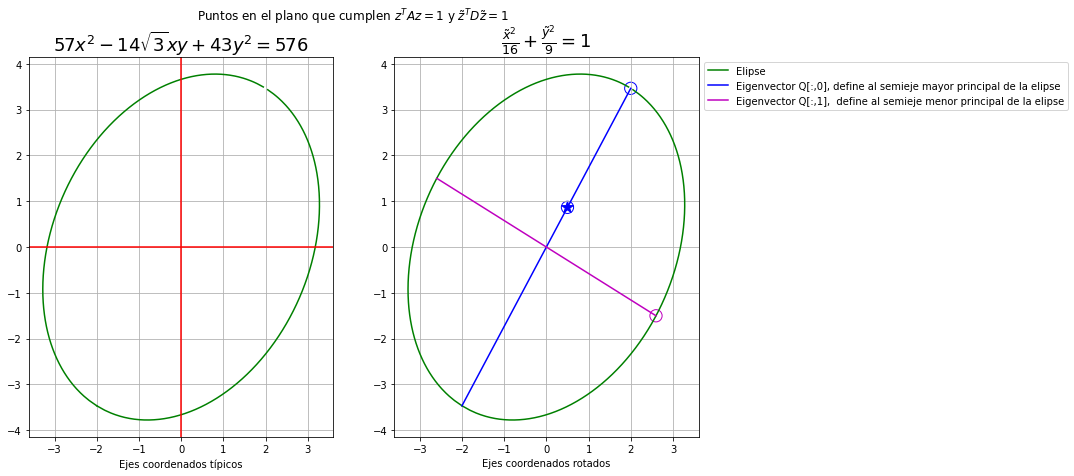

In [23]:
small_value = 1e-4
density=1e-2 + small_value
x=np.arange(-1/d1_inv,1/d1_inv,density)
y1=1/d2_inv*np.sqrt(1-(d1_inv*x)**2)
y2=-1/d2_inv*np.sqrt(1-(d1_inv*x)**2)
#transform
x_y1_hat = np.column_stack((x,y1))
x_y2_hat = np.column_stack((x,y2))
apply_evector_np_permuted = lambda vec : np.transpose(evector_np_permuted@np.transpose(vec))
evector_np_permuted_to_vector_1 = apply_evector_np_permuted(x_y1_hat)
evector_np_permuted_to_vector_2 = apply_evector_np_permuted(x_y2_hat)
fig = plt.figure(figsize=(12, 7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
#first plot
ax1.plot(evector_np_permuted_to_vector_1[:,0],evector_np_permuted_to_vector_1[:,1],'g',
         evector_np_permuted_to_vector_2[:,0],evector_np_permuted_to_vector_2[:,1],'g')
ax1.set_title("$57x^2-14\\sqrt{3}xy+43y^2=576$", fontsize=18)
ax1.set_xlabel("Ejes coordenados típicos")
ax1.axhline(color='r')
ax1.axvline(color='r')
ax1.grid()
#second plot
Evector_1 = np.row_stack((np.zeros(2), evector_1_rescaled))
Evector_2 = np.row_stack((np.zeros(2), evector_2_rescaled))
ax2.plot(evector_np_permuted_to_vector_1[:,0],evector_np_permuted_to_vector_1[:,1],
         color='g', label = "Elipse")
ax2.plot(evector_np_permuted_to_vector_2[:,0],evector_np_permuted_to_vector_2[:,1],
         color='g', label = "_nolegend_")
ax2.plot(Evector_1[:,0], Evector_1[:,1],
         color='b', label = "Eigenvector Q[:,0], define al semieje mayor principal de la elipse")
ax2.plot(-Evector_1[:,0], -Evector_1[:,1],
         color='b', label = "_nolegend_")
ax2.plot(Evector_2[:,0], Evector_2[:,1],
         color='m', label = "Eigenvector Q[:,1],  define al semieje menor principal de la elipse")
ax2.plot(-Evector_2[:,0], -Evector_2[:,1],
         color='m', label = "_nolegend_")
ax2.scatter(evector_np_permuted[0,0], 
            evector_np_permuted[1,0], marker = '*', color='b', s=150)
ax2.scatter(Q_np[0,0], Q_np[1,0], 
            marker='o', facecolors='none', edgecolors='b', 
            s=150)
ax2.scatter(evector_1_rescaled[0], evector_1_rescaled[1], 
            marker='o', facecolors='none', edgecolors='b', 
            s=150)
ax2.scatter(evector_2_rescaled[0], evector_2_rescaled[1], 
            marker='o', facecolors='none', edgecolors='m', 
            s=150)
ax2.set_title("$\\frac{\\tilde{x}^2}{16} + \\frac{\\tilde{y}^2}{9}=1$", fontsize=18)
ax2.set_xlabel("Ejes coordenados rotados")
ax2.legend(bbox_to_anchor=(1, 1))
fig.suptitle("Puntos en el plano que cumplen $z^TAz=1$ y $\\tilde{z}^TD\\tilde{z}=1$")
ax2.grid()
plt.show()

---

**Recuérdese**

$A = Q D Q^T$, $A$ es similar a $D$ matriz diagonal y $Q$ es ortogonal.

---

En la gráfica anterior se representa la rotación de los ejes coordenados definidos por los vectores canónicos $e_1, e_2$ y los rotados definidos por los eigenvectores de $A$. Los eigenvectores de $A$ están en las columnas de $Q$. La primera columna de $Q$ define al eje mayor principal de la elipse y la segunda columna al eje menor principal. La longitud de los semiejes están dados respectivamente por la raíz cuadrada de los recíprocos de los eigenvalores de $A$ que en este caso son: $\frac{1}{16}, \frac{1}{9}$, esto es: $4$ y $3$. Ver por ejemplo: [Principal_axis_theorem](https://en.wikipedia.org/wiki/Principal_axis_theorem), [Diagonalizable_matrix](https://en.wikipedia.org/wiki/Diagonalizable_matrix).

In [24]:
print(evector_1_rescaled)

[2.         3.46410162]


In [25]:
print(np.linalg.norm(evector_1_rescaled))

4.0


---

**Comentario**

Longitud del eigenvector reescalado asociado al eigenvalor mínimo y representa la longitud del semieje mayor de la elipse.

---

In [26]:
print(evector_2_rescaled)

[ 2.59807621 -1.5       ]


In [27]:
print(np.linalg.norm(evector_2_rescaled))

3.0000000000000004


---

**Comentario**

Longitud del eigenvector reescalado asociado al eigenvalor máximo y representa la longitud del semieje menor de la elipse.

---